In [48]:
import numpy as np
import pandas as pd
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from IPython.display import display, Math, Latex
from xgboost import XGBClassifier

In [11]:
train = pd.read_csv('./data/train.csv')

train.pixel245.unique()

array([  0,  85,  39, 254,  12, 252, 113, 253, 228, 217, 248, 233, 186,
        92,  34,  41, 251,  53,   7, 204, 116,  30, 246, 171, 153, 144,
       202,  69, 109,  91, 100, 169, 250,  36, 255, 226, 143,   2,  75,
       213, 234,  15, 191,  84, 126, 122,   5,  59, 244, 239,  57, 134,
        29, 229, 106, 174, 209, 212, 128,  18,  63,  16,  44,  93, 203,
         8, 150,  96, 117,  14, 227, 210,  48,  26, 198,  66,  19, 193,
        40, 243, 127, 108, 141, 119, 140,  64, 159, 187, 230,  76, 156,
       123, 152, 158,  11,  58, 235,  78,  24, 221, 219,  27, 225,  82,
       110,  47, 249,  60,  22,   1,  73, 115, 183, 236, 215, 190, 103,
       170,  21,  35,   9, 232, 131, 166,  94, 136, 237, 222, 180, 200,
         6, 107,  28, 238, 181, 157,  38, 207, 216, 147, 120,  70, 139,
         4,  77,  31, 167, 165, 214, 197,  45, 247, 242,  55,  74,  79,
        20, 129,  23, 240,  89,  25,  50, 148, 154, 102, 105, 218,  13,
       135,  10, 118,  98,  90, 178, 149, 125, 142, 220,  46,  4

In [12]:
target = train.label

train.drop('label', axis=1, inplace=True)

## Principal Component Analysis

In [5]:
X = train.values
X_std = StandardScaler().fit_transform(X)

# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the eigenvalue, eigenvector pair from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:444: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [6]:
trace1 = go.Scatter(
    x=list(range(784)),
    y= cum_var_exp,
    mode='lines+markers',
    name="'Cumulative Explained Variance'",
    hoverinfo= cum_var_exp,
    line=dict(
        shape='spline',
        color = 'goldenrod'
    )
)
trace2 = go.Scatter(
    x=list(range(784)),
    y= var_exp,
    mode='lines+markers',
    name="'Individual Explained Variance'",
    hoverinfo= var_exp,
    line=dict(
        shape='linear',
        color = 'black'
    )
)
fig = tls.make_subplots(insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.5}],
                          print_grid=True)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2,1,1)
fig.layout.title = 'Explained Variance plots - Full and Zoomed-in'
fig.layout.xaxis = dict(range=[0, 80], title = 'Feature columns')
fig.layout.yaxis = dict(range=[0, 60], title = 'Explained Variance')
fig['data'] += [go.Scatter(x= list(range(784)) , y=cum_var_exp, xaxis='x2', yaxis='y2', name = 'Cumulative Explained Variance')]
fig['data'] += [go.Scatter(x=list(range(784)), y=var_exp, xaxis='x2', yaxis='y2',name = 'Individual Explained Variance')]

# fig['data'] = data
# fig['layout'] = layout
# fig['data'] += data2
# fig['layout'] += layout2
py.iplot(fig, filename='inset example')

This is the format of your plot grid:
[ (1,1) x1,y1 ]

With insets:
[ x2,y2 ] over [ (1,1) x1,y1 ]



In [16]:
n_components = 200
pca = PCA(n_components=n_components).fit(X_std)

eigenvalues = pca.components_.reshape(n_components, 28, 28)

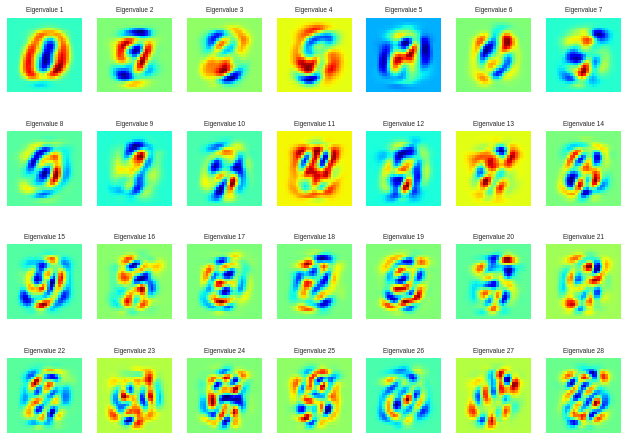

In [9]:
n_row = 4
n_col = 7

# Plot the first 8 eignenvalues
plt.figure(figsize=(11,8))
for i in list(range(n_row * n_col)):
#     for offset in [10, 30,0]:
#     plt.subplot(n_row, n_col, i + 1)
    offset =0
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(eigenvalues[i].reshape(28,28), cmap='jet')
    title_text = 'Eigenvalue ' + str(i + 1)
    plt.title(title_text, size=6.5)
    plt.xticks(())
    plt.yticks(())
plt.show()

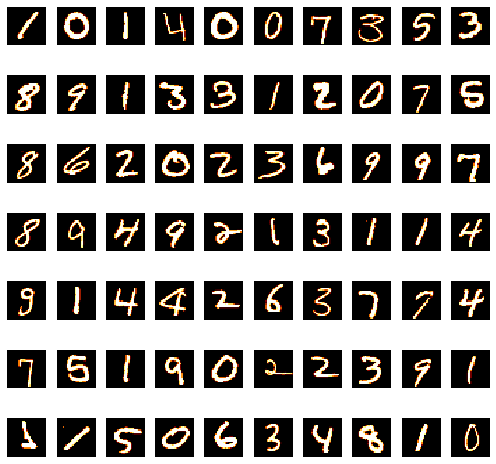

In [10]:
plt.figure(figsize=(7,7))
for digit_num in range(0,70):
    plt.subplot(7,10,digit_num+1)
    grid_data = train.iloc[digit_num].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "afmhot")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

In [17]:
X_pca = pca.transform(X_std)

In [20]:
trace0 = go.Scatter(
    x = X_pca[:3000,0],
    y = X_pca[:3000,1],
    name = target[:3000],
    hoveron = target[:3000],
    mode = 'markers',
    text = target[:3000],
    showlegend = False,
    marker = dict(
        size = 8,
        color = target[:3000],
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [trace0]

layout = go.Layout(
    title= 'Principal Component Analysis (PCA)',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Principal Component',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= True
)


fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

In [24]:
kmeans = KMeans(n_clusters=9)
X_clustered = kmeans.fit_predict(X_pca)

In [25]:
trace_Kmeans = go.Scatter(x=X_pca[:3000, 0], y= X_pca[:3000, 1], mode="markers",
                    showlegend=False,
                    marker=dict(
                            size=8,
                            color = X_clustered,
                            colorscale = 'Portland',
                            showscale=False, 
                            line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        )
                   ))

layout = go.Layout(
    title= 'KMeans Clustering',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Principal Component',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= True
)

data = [trace_Kmeans]
fig1 = dict(data=data, layout= layout)
py.iplot(fig1, filename="svm")

In [28]:
lda = LDA(n_components=10)
X_LDA = lda.fit_transform(X_std, target.values)

In [30]:
traceLDA = go.Scatter(
    x = X_LDA[:3000,0],
    y = X_LDA[:3000,1],
    name = target[:3000],
    mode = 'markers',
    text = target[:3000],
    showlegend = True,
    marker = dict(
        size = 8,
        color = target[:3000],
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [traceLDA]

layout = go.Layout(
    title= 'Linear Discriminant Analysis (LDA)',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Linear Discriminant',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Linear Discriminant',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

In [31]:
tsne = TSNE()
tsne_results = tsne.fit_transform(X_std)

In [32]:
traceTSNE = go.Scatter(
    x = tsne_results[:3000,0],
    y = tsne_results[:3000,1],
    name = target[:3000],
     hoveron = target[:3000],
    mode = 'markers',
    text = target[:3000],
    showlegend = True,
    marker = dict(
        size = 8,
        color = target[:3000],
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [traceTSNE]

layout = dict(title = 'TSNE (T-Distributed Stochastic Neighbour Embedding)',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= False,

             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

In [38]:
train.shape

(42000, 784)

In [39]:
test = pd.read_csv('./data/test.csv')
test.shape

(28000, 784)

In [41]:
X_test = test.values
X_std_test = StandardScaler().fit_transform(X_test)

In [42]:
test_tsne = tsne.fit_transform(X_std_test)

In [62]:
def write_preds(preds, fname):
    pd.DataFrame({"ImageId": list(range(1,len(preds)+1)), "Label": preds}).to_csv(fname, index=False, header=True)

write_preds(y_pred, "tsne_xgb.csv")